In [1]:
import sys
sys.path.append(".")

In [2]:
from Backup.mediapipe_test import mp_demo, get_datapoints, draw_datapoints
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

I0000 00:00:1722211955.803004 11950111 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 560X OpenGL Engine


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


2024-07-28 17:12:36.085 Python[39490:11950111] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


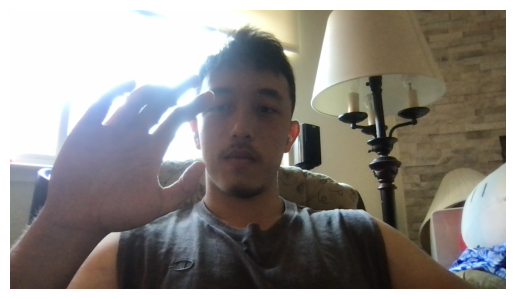

In [3]:
results, image = mp_demo(stop_frame=10)
org_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(org_image)
plt.axis('off')
plt.show()


In [4]:
print(type(results.pose_landmarks))
print(type(results.right_hand_landmarks))
print(type(results.left_hand_landmarks))
print(type(results.face_landmarks))

pose = np.array([[p.x, p.y, p.z, p.visibility] for p in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
right = np.array([[p.x, p.y, p.z] for p in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
left = np.array([[p.x, p.y, p.z] for p in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
face = np.array([[p.x, p.y, p.z] for p in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)



<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
<class 'NoneType'>
<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>


6


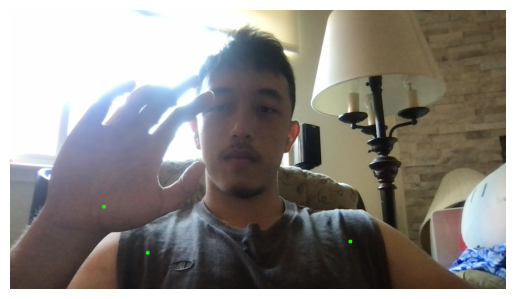

In [7]:
image = copy.deepcopy(org_image)

# image = draw_datapoints(results.face_landmarks, [70, 63, 105, 66, 107, 46, 53, 52, 65, 55], image) #left eyebrow
# image = draw_datapoints(results.face_landmarks, [336, 296, 334, 293, 300, 285, 295, 282, 283, 276], image) #right eyebrow

# image = draw_datapoints(results.face_landmarks, [146, 77, 96, 95, 91, 90, 89, 88, 181, 180, 179, 178, 87, 86, 85, 84, 
#                                                  14, 15, 16, 17, 317, 316, 315, 314, 402, 403, 404, 405, 318, 319, 320, 321,
#                                                  324, 325, 307, 375, 306, 292, 62, 78], image) #bottom lip
# image = draw_datapoints(results.face_landmarks, [61, 76, 185, 184, 183, 191, 40, 74, 42, 80, 39, 73, 41, 81, 37, 72, 
#                                                  38, 82, 0, 11, 12, 13, 267, 302, 268, 312, 269, 303, 271, 311, 270, 304, 272, 310,
#                                                  409, 408, 407, 415, 291, 308], image) #top lip

# image = draw_datapoints(results.face_landmarks, [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 401, 361, 435, 288,
#                                                  397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 
#                                                  132, 93, 234, 127, 162, 21, 54, 103, 67, 109], image) #face outline

# image = draw_datapoints(results.right_hand_landmarks, [i for i in range(21)], image) #right hand
# image = draw_datapoints(results.left_hand_landmarks, [i for i in range(21)], image) #left hand

# image = draw_datapoints(results.pose_landmarks, [11, 12, 13, 14, 15, 16], image) #wrist, elbow, shoulder



plt.imshow(image)
plt.axis('off')
plt.show()
